# PyPSA-Eur style power system plot

## Authored by F.Hofmann

The notebook reproduces the plot like a beautiful scheme of the
European Transmission System published in https://arxiv.org/abs/1806.01613.

In [4]:
#"""
#Created on Mon Sep 19 15:51:31 2022
#
#@author: fabian
#"""

In [5]:
import pypsa
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from datetime import datetime
from cartopy import crs as ccrs
from pypsa.plot import add_legend_circles, add_legend_lines, add_legend_patches
import plotly.express as px
import hvplot.pandas
import matplotlib.colors as mcolors

Two files are needed:
* PyPSA network file (e.g. "elec.nc" contains a lot of details and looks perfect)
* a country shape file (may by found in "resources/shapes/country_shapes.geojson")

In [6]:
scenario_name = "nz_nosmr"  # scenario name, default value is "" for tutorial or default configuration
                    # value shall be non null if a scenario name is specified under the "run" tag in the config file

scenario_subpath = scenario_name + "/" if scenario_name else ""

export_level = 0
carrier = "onwind"

n=pypsa.Network(f"../../results/" + scenario_name + f"/postnetworks/elec_s_10_ec_lc3.0_Co2L_3H_2030_0.071_AB_{export_level}export.nc")
regions_onshore = gpd.read_file("../../results/shapes/country_shapes.geojson")

INFO:pypsa.io:Imported network elec_s_10_ec_lc3.0_Co2L_3H_2030_0.071_AB_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [7]:
OUTPUT = f"../../results/figures/" + scenario_name + f"/{carrier}_{export_level}export.pdf"
OUTPUT_png = f"../../results/figures/" + scenario_name + f"/{carrier}_{export_level}export.png"

In [8]:
color = {
    "solar": "#f9d002",
    "onwind": "#235ebc"
}

Define plot parameters:

In [9]:
bus_scale = 5e3 
line_scale = 3e3

In [10]:
cap = n.generators[n.generators.carrier == carrier] #.p_nom_opt #.sum()

In [12]:
# add x and y coordinates of buses to the solar df
x = n.buses.loc[cap.bus.values].x.values
y = n.buses.loc[cap.bus.values].y.values

# combine to geodataframe
cap = gpd.GeoDataFrame(cap, geometry=gpd.points_from_xy(x, y))

In [13]:
capacity_scale = 10
extent = [165.0, 180.0, -48.0, -33.0] # for country NZ [165.0, 180.0, -50.0, -25.0] 
parameter = "p_nom_opt"

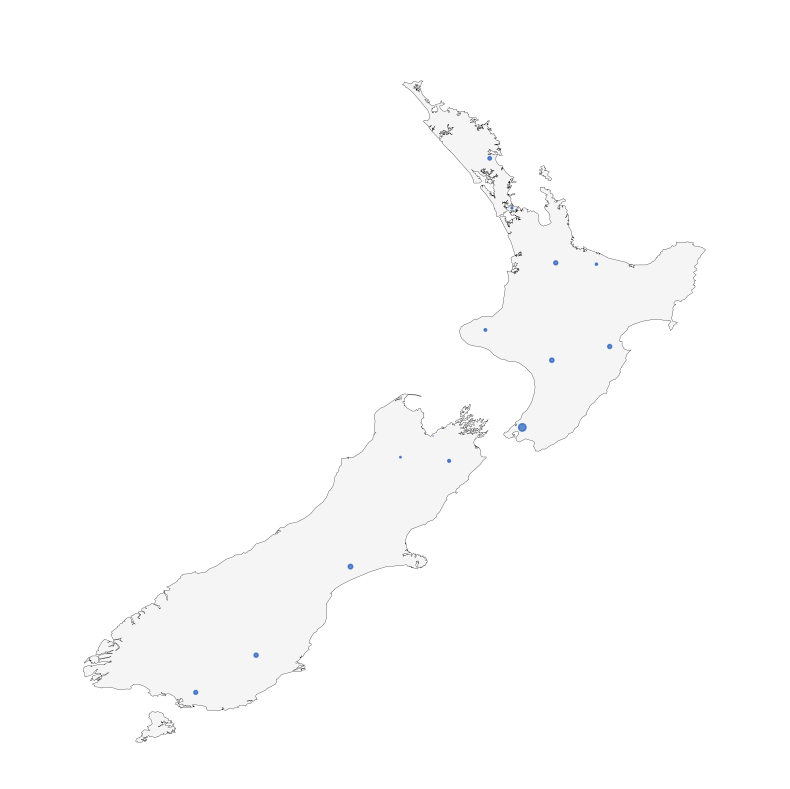

In [22]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": ccrs.PlateCarree(), "frameon": False})

regions_onshore.plot(
    ax=ax,
    facecolor="whitesmoke",
    edgecolor="black",
    aspect="equal",
    transform=ccrs.PlateCarree(),
    linewidth=0.2,
)
cap.plot(ax=ax, 
           color=color[carrier],
            markersize=cap[parameter] / capacity_scale, 
            alpha=0.7,
            transform=ccrs.PlateCarree()
            )



ax.set_extent(extent)
fig.tight_layout()
fig.savefig(OUTPUT, bbox_inches="tight", dpi=300)
fig.savefig(OUTPUT_png, bbox_inches="tight", dpi=300)

### Export

In [ ]:
export = n.links_t.p0.loc[:, n.links[n.links.bus1=="H2 export bus"].index]

In [ ]:
export.sum() * n.snapshot_weightings.generators[0]

Link
NZ.1_1_AC H2 export    0.000892
NZ.8_1_AC H2 export    0.000856
dtype: float64

<AxesSubplot:title={'center':'Export 0 TWh'}, xlabel='snapshot', ylabel='Hydrogen export (MW)'>

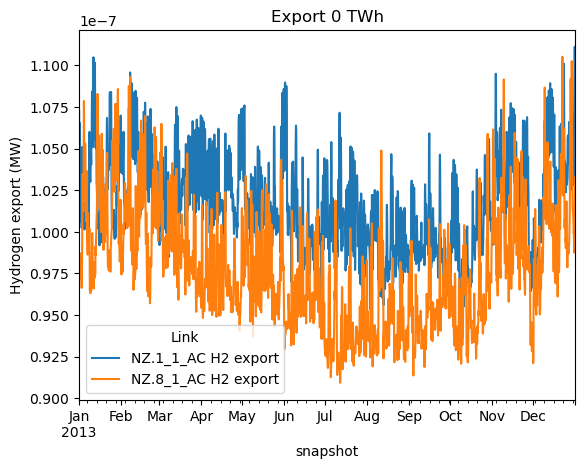

In [ ]:
export.plot(ylabel="Hydrogen export (MW)", title=f"Export {export_level} TWh") #[0:2000]